In [28]:
import thinfilm as tm
import material as ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

In [ ]:
air = ml.Non_Dispersion(1)
Acrylic = ml.open_material('Acrylic', 'Sellmeier')
SiN = ml.open_material('SiN', 'Sellmeier')
SiO2 = ml.open_material('SiO2', 'Sellmeier')
ITO = ml.open_material('ITO', 'Sellmeier')
sodalime = ml.open_material('sodalime', 'Material')
OC = ml.open_material('OC', 'Sellmeier')

SL_dia = tm.Design(
    [air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, 1708, 14.6, 28.3, 26, 27.4, 14.3, None]
)

SL_bri = tm.Design(
    [air, OC, SiN, SiO2, ITO, OC, ITO, SiO2, SiN, sodalime],
    [None, 1237.6, 11.4, 23.7, 8.4, 1048.4, 33.7, 46.9, 11.5, None]
)

In [19]:
wl = np.linspace(400, 700, 200)
R = SL_dia.reflectance(wl)
file7 = pd.read_csv('./measurement/R_5_B7.csv')
www = file7['nm']
r7 = file7['SCAN']

In [22]:
hypo = lambda th: tm.Design(
    [air, Acrylic, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(www)

fom = lambda th: sum((hypo(th)*100 - r7)**2)

In [50]:
tol = 2
res = differential_evolution(
    fom, [
        (1708*0.9, 1708*1.1), 
        (14.6-tol, 14.6+tol), 
        (28.3-tol, 28.3+tol), 
        (26-tol, 26+tol), 
        (27.4-tol, 27.4+tol), 
        (14.3-tol, 14.3+tol)
    ]
)

[1768.33714241   14.7687651    26.9647211    24.           25.4
   13.80553687]
Optimization terminated successfully.


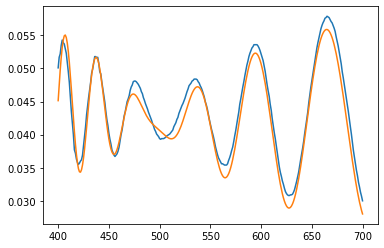

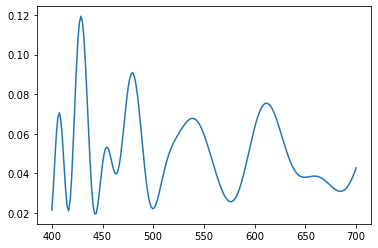

In [51]:
print(res.x)
print(res.message)
plt.plot(www, r7/100)
#plt.plot(wl, R)
plt.plot(www, hypo(res.x))
plt.show()
plt.plot(wl, SL_bri.reflectance(wl))
plt.show()